In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *
from control.matlab import *
import control as ct

plt.style.use('default')

In [2]:
df_e_arx_hall_n11_d  = pd.read_csv('../data/e_arx_hall_n11_d.csv' ,header=None)
df_e_ed_hall_n11_d   = pd.read_csv('../data/e_ed_hall_n11_d.csv'  ,header=None)
df_e_arx_tempo_n11_d = pd.read_csv('../data/e_arx_tempo_n11_d.csv',header=None)
df_e_ed_tempo_n11_d  = pd.read_csv('../data/e_ed_tempo_n11_d.csv' ,header=None)

In [3]:
df_data_validation_hall_n11  = pd.read_csv('../data/entrada_saida_cossenos_emax_hall_n11_20ms.csv' , header=None)
df_data_validation_tempo_n11 = pd.read_csv('../data/entrada_saida_cossenos_emax_tempo_n11_20ms.csv', header=None)

In [4]:
e_arx_hall_n11_d  = np.array(df_e_arx_hall_n11_d[0] ,ndmin=2).T
e_ed_hall_n11_d   = np.array(df_e_ed_hall_n11_d[0]  ,ndmin=2).T
e_arx_tempo_n11_d = np.array(df_e_arx_tempo_n11_d[0],ndmin=2).T
e_ed_tempo_n11_d  = np.array(df_e_ed_tempo_n11_d[0] ,ndmin=2).T

In [5]:
data_hall_n11  = np.array(df_data_validation_hall_n11    , ndmin=2)
u_ar_hall_n11  = np.array(df_data_validation_hall_n11[0] , ndmin=2).T

data_tempo_n11 = np.array(df_data_validation_tempo_n11   , ndmin=2)
u_ar_tempo_n11 = np.array(df_data_validation_tempo_n11[0], ndmin=2).T

In [6]:
u_ar_hall_n11 = u_ar_hall_n11[7:]
u_ar_tempo_n11 = u_ar_tempo_n11[6:-1]

In [7]:
print(u_ar_hall_n11.size == u_ar_tempo_n11.size)
print(u_ar_hall_n11.size == e_arx_hall_n11_d.size)
print(e_arx_tempo_n11_d.size == u_ar_tempo_n11.size)


True
True
True


In [8]:
best_order_hall_n11  = find_best_FIR_order(u_ar_hall_n11 ,e_arx_hall_n11_d ,5,0.15,True)
best_order_hall_n11  = find_best_FIR_order(u_ar_hall_n11 ,e_ed_hall_n11_d  ,5,0.15,True)
best_order_tempo_n11 = find_best_FIR_order(u_ar_tempo_n11,e_arx_tempo_n11_d,5,0.15,True)
best_order_tempo_n11 = find_best_FIR_order(u_ar_tempo_n11,e_ed_tempo_n11_d ,5,0.15,True)

FIR 1ª ordem V = 1200.3124622588289
FIR 2ª ordem V = 1178.1845437397305
1 é a melhor ordem
FIR 1ª ordem V = 1632.9397214972935
FIR 2ª ordem V = 1124.5054116690983
FIR 3ª ordem V = 1124.0035081270612
2 é a melhor ordem
FIR 1ª ordem V = 1866.03740536279
FIR 2ª ordem V = 1864.4044356202687
1 é a melhor ordem
FIR 1ª ordem V = 3007.3647444990042
FIR 2ª ordem V = 2660.3438803926833
1 é a melhor ordem


In [9]:
best_order_hall_n11  = find_best_ARX_order(u_ar_hall_n11 ,e_arx_hall_n11_d ,5,0.15,True)
best_order_hall_n11  = find_best_ARX_order(u_ar_hall_n11 ,e_ed_hall_n11_d  ,5,0.15,True)
best_order_tempo_n11 = find_best_ARX_order(u_ar_tempo_n11,e_arx_tempo_n11_d,5,0.15,True)
best_order_tempo_n11 = find_best_ARX_order(u_ar_tempo_n11,e_ed_tempo_n11_d ,5,0.15,True)

ARX 1ª ordem V = 1204.9433123262806
ARX 2ª ordem V = 1194.6248761178344
1 é a melhor ordem
ARX 1ª ordem V = 1579.3329556402985
ARX 2ª ordem V = 1381.5760052127546
1 é a melhor ordem
ARX 1ª ordem V = 1870.8088347090481
ARX 2ª ordem V = 1890.7507089790718
1 é a melhor ordem
ARX 1ª ordem V = 3000.7675487688625
ARX 2ª ordem V = 2959.9758266071494
1 é a melhor ordem


In [10]:
Y_e_arx_hall_n11_d , phi_e_arx_hall_n11_d  = build_Y_phi_FIR(u_ar_hall_n11 ,e_arx_hall_n11_d ,best_order_hall_n11 )
Y_e_ed_hall_n11_d  , phi_e_ed_hall_n11_d   = build_Y_phi_FIR(u_ar_hall_n11 ,e_ed_hall_n11_d  ,best_order_hall_n11 )
Y_e_arx_tempo_n11_d, phi_e_arx_tempo_n11_d = build_Y_phi_FIR(u_ar_tempo_n11,e_arx_tempo_n11_d,best_order_tempo_n11)
Y_e_ed_tempo_n11_d , phi_e_ed_tempo_n11_d  = build_Y_phi_FIR(u_ar_tempo_n11,e_ed_tempo_n11_d ,best_order_tempo_n11)

theta_hat_e_arx_hall_n11_d  = calcular_theta_min_quad(Y_e_arx_hall_n11_d , phi_e_arx_hall_n11_d )
theta_hat_e_ed_hall_n11_d   = calcular_theta_min_quad(Y_e_ed_hall_n11_d  , phi_e_ed_hall_n11_d  )
theta_hat_e_arx_tempo_n11_d = calcular_theta_min_quad(Y_e_arx_tempo_n11_d, phi_e_arx_tempo_n11_d)
theta_hat_e_ed_tempo_n11_d  = calcular_theta_min_quad(Y_e_ed_tempo_n11_d , phi_e_ed_tempo_n11_d )

e_hat_arx_hall_n11_d  = estimate_output_FIR(u=u_ar_hall_n11 ,theta=theta_hat_e_arx_hall_n11_d ,ord=best_order_hall_n11 )
e_hat_ed_hall_n11_d   = estimate_output_FIR(u=u_ar_hall_n11 ,theta=theta_hat_e_ed_hall_n11_d  ,ord=best_order_hall_n11 )
e_hat_arx_tempo_n11_d = estimate_output_FIR(u=u_ar_tempo_n11,theta=theta_hat_e_arx_tempo_n11_d,ord=best_order_tempo_n11)
e_hat_ed_tempo_n11_d  = estimate_output_FIR(u=u_ar_tempo_n11,theta=theta_hat_e_ed_tempo_n11_d ,ord=best_order_tempo_n11)

In [11]:
Y_e_arx_hall_n11_d , phi_e_arx_hall_n11_d  = build_Y_phi_ARX(u_ar_hall_n11 ,e_arx_hall_n11_d ,best_order_hall_n11 )
Y_e_ed_hall_n11_d  , phi_e_ed_hall_n11_d   = build_Y_phi_ARX(u_ar_hall_n11 ,e_ed_hall_n11_d  ,best_order_hall_n11 )
Y_e_arx_tempo_n11_d, phi_e_arx_tempo_n11_d = build_Y_phi_ARX(u_ar_tempo_n11,e_arx_tempo_n11_d,best_order_tempo_n11)
Y_e_ed_tempo_n11_d , phi_e_ed_tempo_n11_d  = build_Y_phi_ARX(u_ar_tempo_n11,e_ed_tempo_n11_d ,best_order_tempo_n11)

theta_hat_e_arx_hall_n11_d  = calcular_theta_min_quad(Y_e_arx_hall_n11_d , phi_e_arx_hall_n11_d )
theta_hat_e_ed_hall_n11_d   = calcular_theta_min_quad(Y_e_ed_hall_n11_d  , phi_e_ed_hall_n11_d  )
theta_hat_e_arx_tempo_n11_d = calcular_theta_min_quad(Y_e_arx_tempo_n11_d, phi_e_arx_tempo_n11_d)
theta_hat_e_ed_tempo_n11_d  = calcular_theta_min_quad(Y_e_ed_tempo_n11_d , phi_e_ed_tempo_n11_d )

e_hat_arx_hall_n11_d  = estimate_output(y=e_arx_hall_n11_d ,u=u_ar_hall_n11 ,theta=theta_hat_e_arx_hall_n11_d ,ord=best_order_hall_n11 )
e_hat_ed_hall_n11_d   = estimate_output(y=e_ed_hall_n11_d  ,u=u_ar_hall_n11 ,theta=theta_hat_e_ed_hall_n11_d  ,ord=best_order_hall_n11 )
e_hat_arx_tempo_n11_d = estimate_output(y=e_arx_tempo_n11_d,u=u_ar_tempo_n11,theta=theta_hat_e_arx_tempo_n11_d,ord=best_order_tempo_n11)
e_hat_ed_tempo_n11_d  = estimate_output(y=e_ed_tempo_n11_d ,u=u_ar_tempo_n11,theta=theta_hat_e_ed_tempo_n11_d ,ord=best_order_tempo_n11)

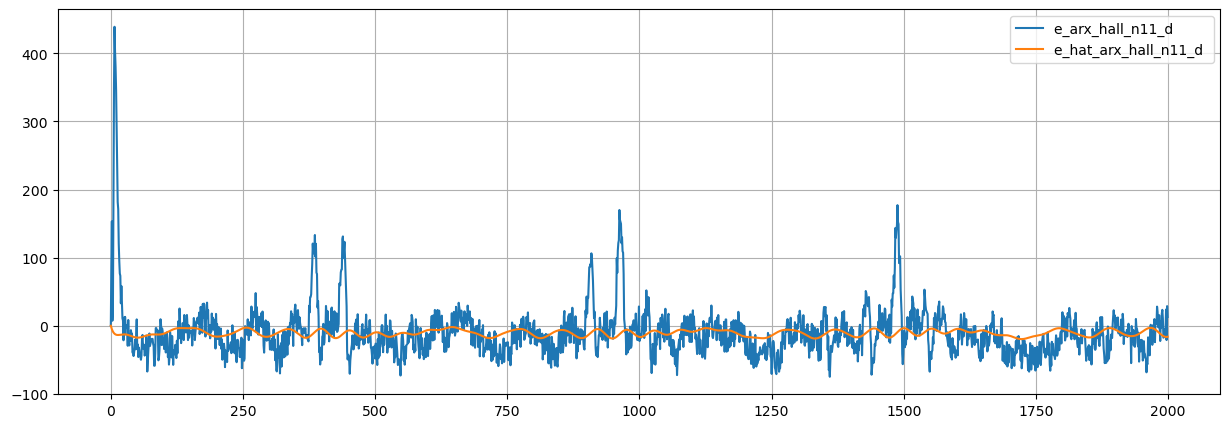

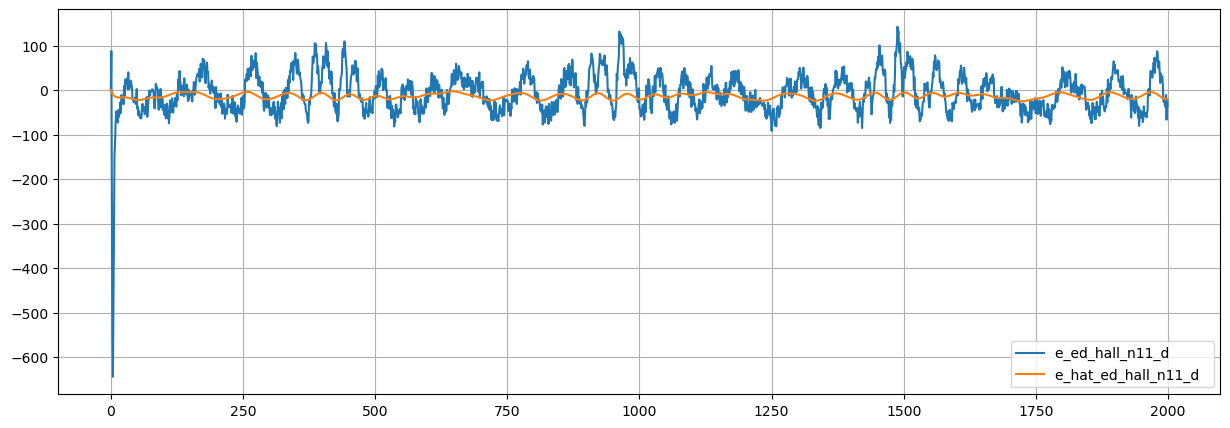

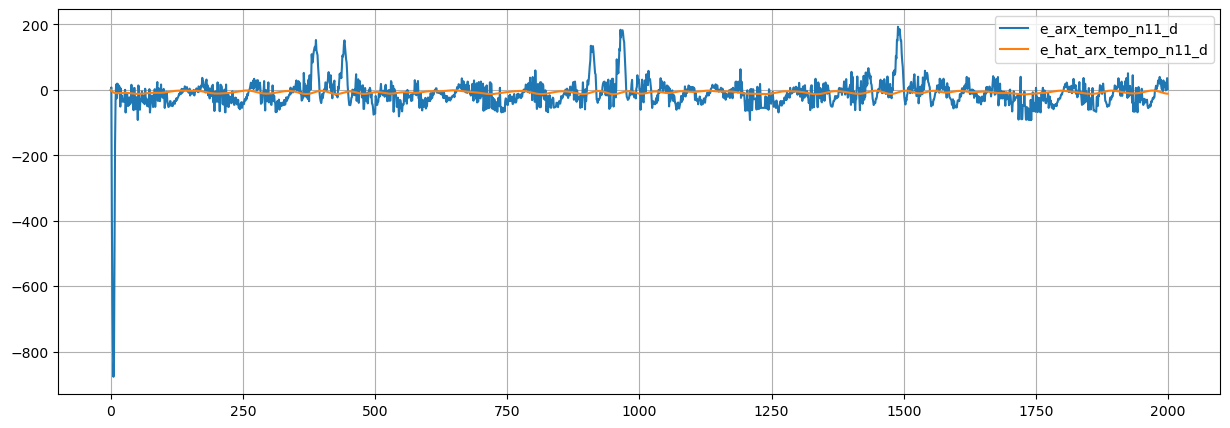

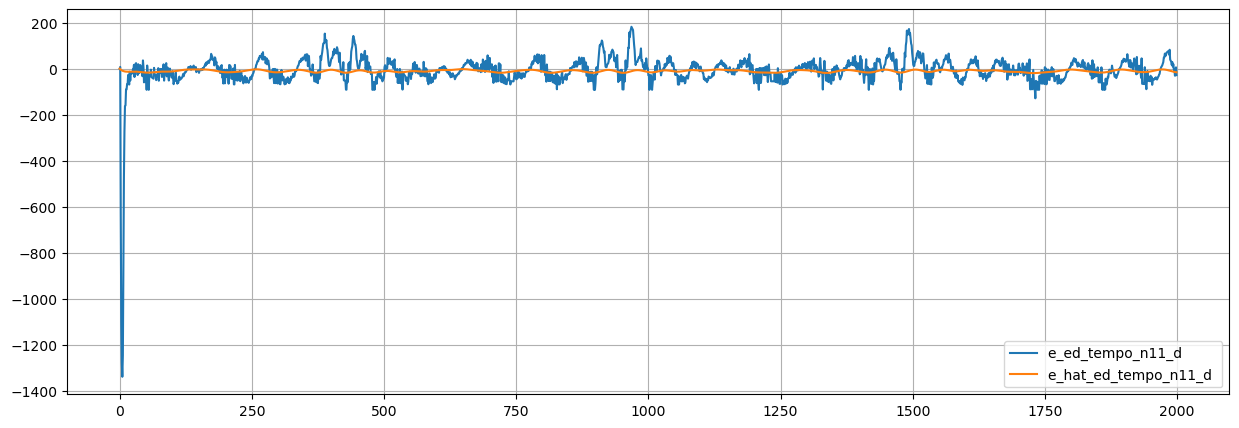

In [12]:
T1 = 0
T2 = 2000

plt.figure(1,figsize=[15,5])
plt.grid(True)

plt.plot(e_arx_hall_n11_d[T1:T2]    ,label='e_arx_hall_n11_d ')
plt.plot(e_hat_arx_hall_n11_d[T1:T2],label='e_hat_arx_hall_n11_d ')
plt.legend()


plt.figure(2,figsize=[15,5])
plt.grid(True)

plt.plot(e_ed_hall_n11_d[T1:T2]    ,label='e_ed_hall_n11_d  ')
plt.plot(e_hat_ed_hall_n11_d[T1:T2],label='e_hat_ed_hall_n11_d  ')
plt.legend()


plt.figure(3,figsize=[15,5])
plt.grid(True)

plt.plot(e_arx_tempo_n11_d[T1:T2]    ,label='e_arx_tempo_n11_d')
plt.plot(e_hat_arx_tempo_n11_d[T1:T2],label='e_hat_arx_tempo_n11_d')
plt.legend()


plt.figure(4,figsize=[15,5])
plt.grid(True)

plt.plot(e_ed_tempo_n11_d[T1:T2]    ,label='e_ed_tempo_n11_d ')
plt.plot(e_hat_ed_tempo_n11_d[T1:T2],label='e_hat_ed_tempo_n11_d ')
plt.legend()

In [13]:
u_impulse_hall_n11  = np.zeros(u_ar_hall_n11 .shape) 
u_impulse_tempo_n11 = np.zeros(u_ar_tempo_n11.shape)

u_impulse_hall_n11[1]  = u_ar_hall_n11.size
u_impulse_tempo_n11[1] = u_ar_tempo_n11.size

In [14]:
e_impulse_hat_arx_hall_n11_d  = estimate_output(y=e_arx_hall_n11_d ,u=u_impulse_hall_n11 ,theta=theta_hat_e_arx_hall_n11_d ,ord=best_order_hall_n11 )
e_impulse_hat_ed_hall_n11_d   = estimate_output(y=e_ed_hall_n11_d  ,u=u_impulse_hall_n11 ,theta=theta_hat_e_ed_hall_n11_d  ,ord=best_order_hall_n11 )
e_impulse_hat_arx_tempo_n11_d = estimate_output(y=e_arx_tempo_n11_d,u=u_impulse_tempo_n11,theta=theta_hat_e_arx_tempo_n11_d,ord=best_order_tempo_n11)
e_impulse_hat_ed_tempo_n11_d  = estimate_output(y=e_ed_tempo_n11_d ,u=u_impulse_tempo_n11,theta=theta_hat_e_ed_tempo_n11_d ,ord=best_order_tempo_n11)

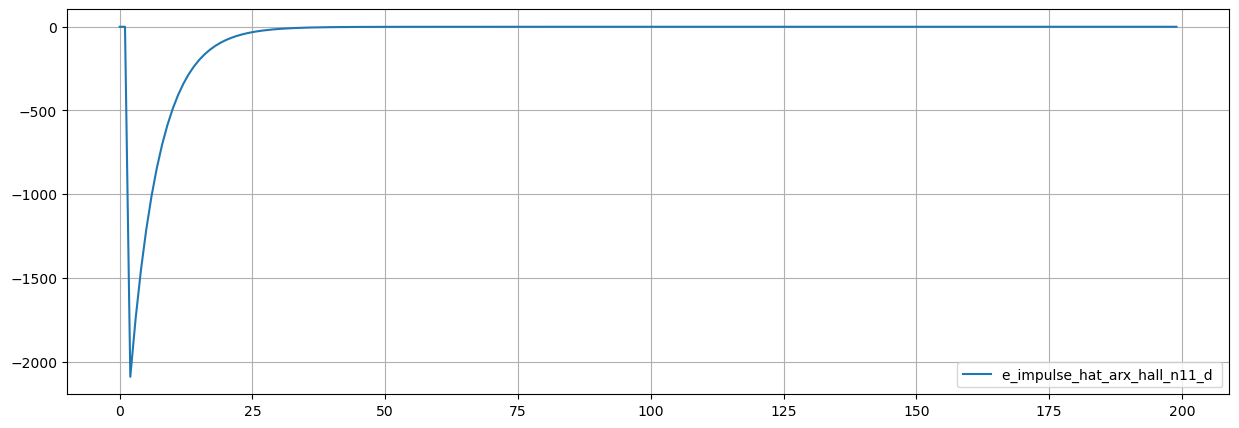

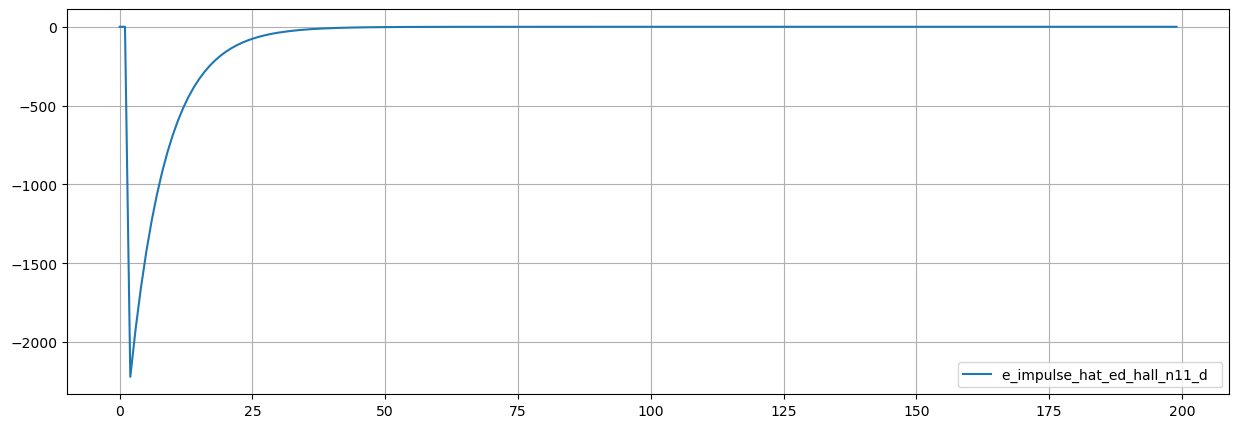

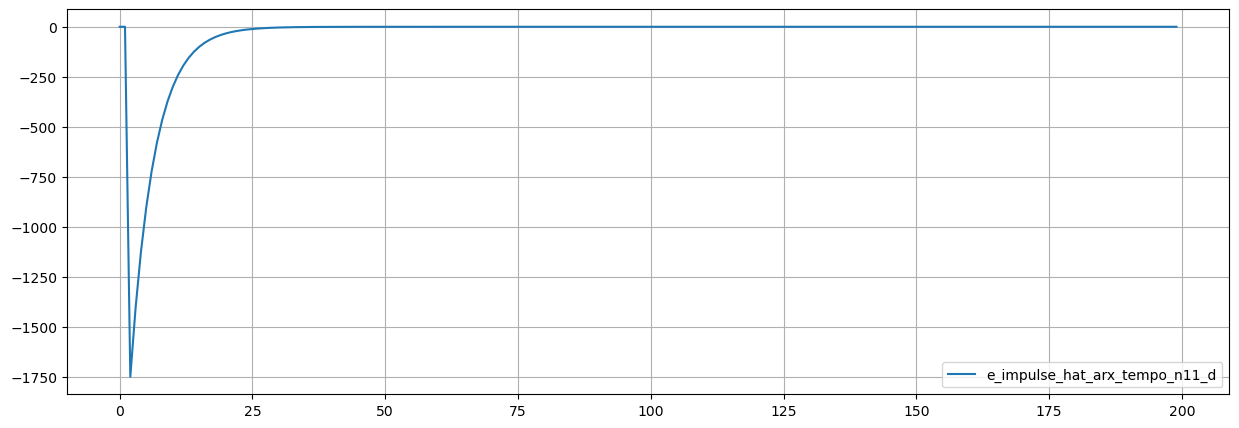

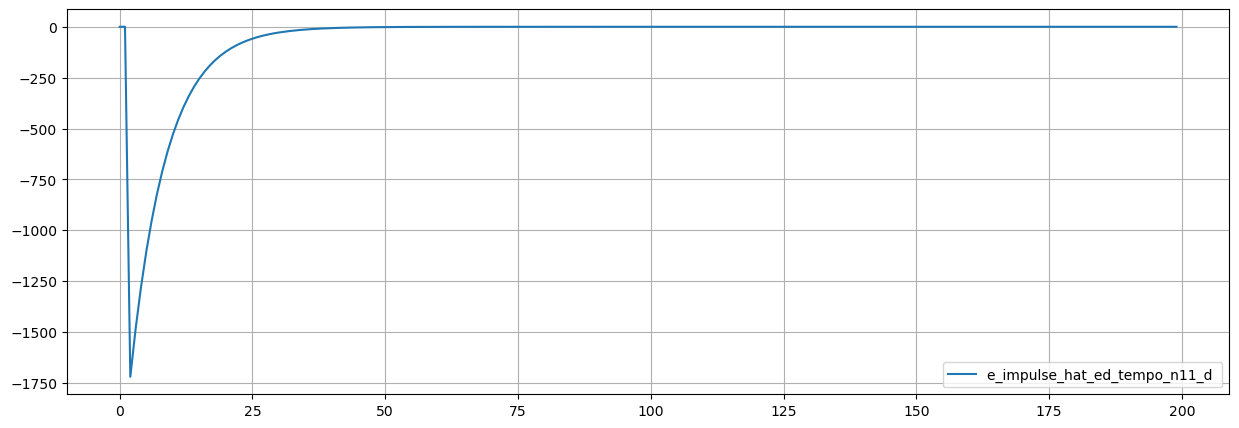

In [15]:
T1 = 0
T2 = 200

plt.figure(1,figsize=[15,5])
plt.grid(True)

plt.plot(e_impulse_hat_arx_hall_n11_d[T1:T2],label='e_impulse_hat_arx_hall_n11_d ')
plt.legend()


plt.figure(2,figsize=[15,5])
plt.grid(True)

plt.plot(e_impulse_hat_ed_hall_n11_d[T1:T2],label='e_impulse_hat_ed_hall_n11_d  ')
plt.legend()


plt.figure(3,figsize=[15,5])
plt.grid(True)

plt.plot(e_impulse_hat_arx_tempo_n11_d[T1:T2],label='e_impulse_hat_arx_tempo_n11_d')
plt.legend()


plt.figure(4,figsize=[15,5])
plt.grid(True)

plt.plot(e_impulse_hat_ed_tempo_n11_d[T1:T2],label='e_impulse_hat_ed_tempo_n11_d ')
plt.legend()

Error Model Frequency Response

E(z=e^jw), w = [-pi,pi]

In [16]:
Ts = 0.02048
a1, b1 = theta_hat_e_arx_hall_n11_d[:,0]
num = [b1]
den = [1, a1]
sys_e_arx_hall_n11_d = ct.tf(num,den,Ts)

Ts = 0.02048
a1, b1 = theta_hat_e_ed_hall_n11_d[:,0]
num = [b1]
den = [1, a1]
sys_e_ed_hall_n11_d = ct.tf(num,den,Ts)

Ts = 0.02048
a1, b1 = theta_hat_e_arx_tempo_n11_d[:,0]
num = [b1]
den = [1, a1]
sys_e_arx_tempo_n11_d = ct.tf(num,den,Ts)

Ts = 0.02048
a1, b1 = theta_hat_e_ed_tempo_n11_d[:,0]
num = [b1]
den = [1, a1]
sys_e_ed_tempo_n11_d = ct.tf(num,den,Ts)

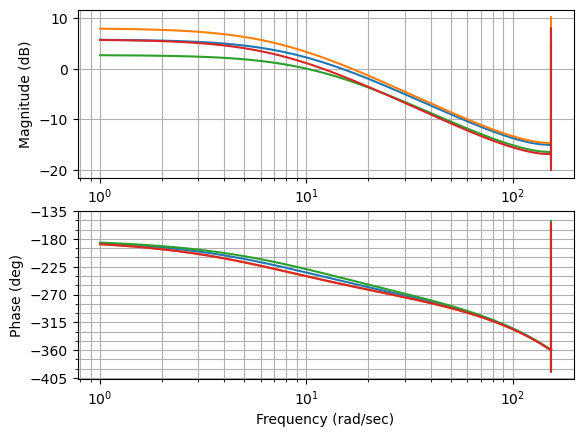

In [20]:
mag_arx_h, phase_arx_h, omega_arx_h = bode(sys_e_arx_hall_n11_d )
mag_ed_h, phase_ed_h, omega_ed_h    = bode(sys_e_ed_hall_n11_d  )
mag_arx_t, phase_arx_t, omega_arx_t = bode(sys_e_arx_tempo_n11_d)
mag_ed_t, phase_ed_t, omega_ed_t    = bode(sys_e_ed_tempo_n11_d )

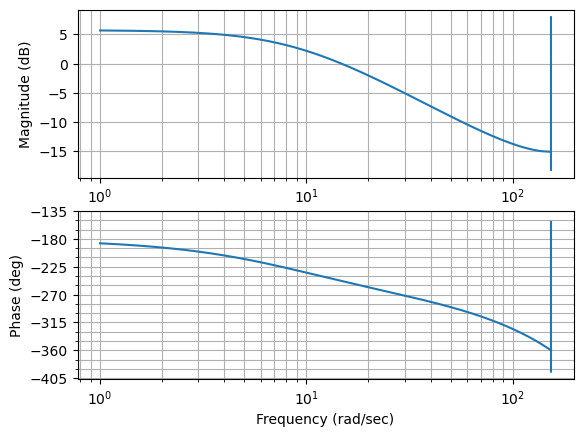

In [21]:
mag_arx_h, phase_arx_h, omega_arx_h = bode(sys_e_arx_hall_n11_d )

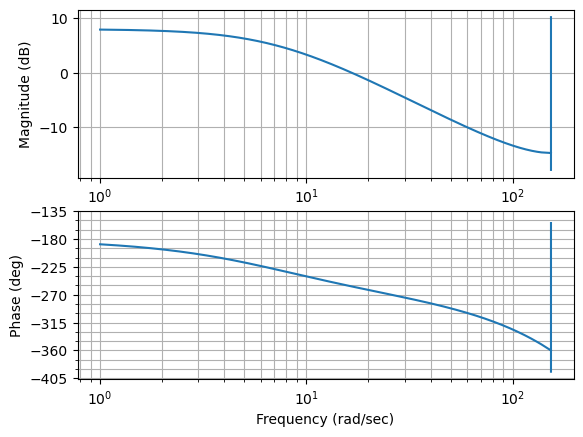

In [22]:
mag_ed_h, phase_ed_h, omega_ed_h    = bode(sys_e_ed_hall_n11_d  )

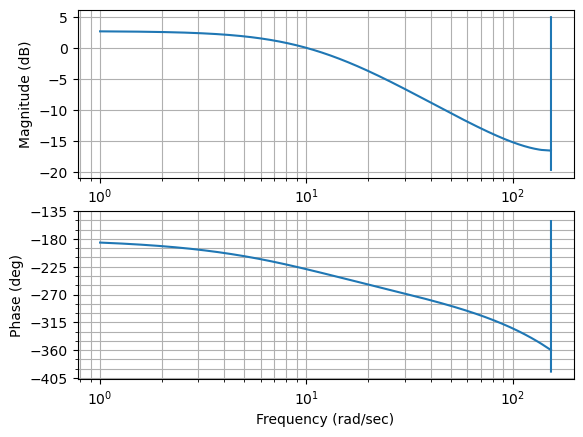

In [23]:
mag_arx_t, phase_arx_t, omega_arx_t = bode(sys_e_arx_tempo_n11_d)

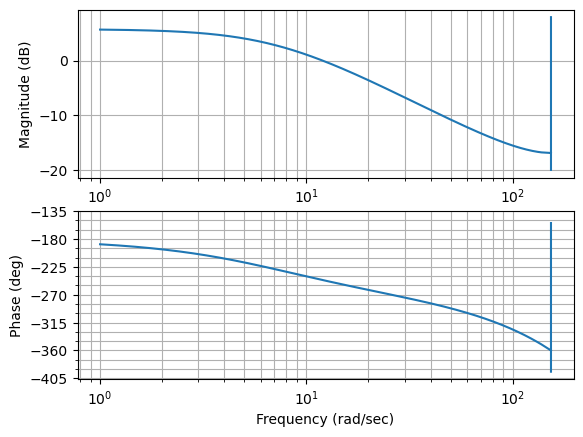

In [24]:
mag_ed_t, phase_ed_t, omega_ed_t    = bode(sys_e_ed_tempo_n11_d )